### Baklazhenko Danila J4132. Practice work №6 - Algorithms on graphs. Path search algorithms on weighted graphs

In [1]:
#Import all neseccarily libraries

import numpy as np
import networkx as netx #Graph library
import sys
import random
import timeit
import matplotlib.pyplot as plt 
np.set_printoptions(threshold = sys.maxsize)

from collections import deque

#### Generate weighted graph

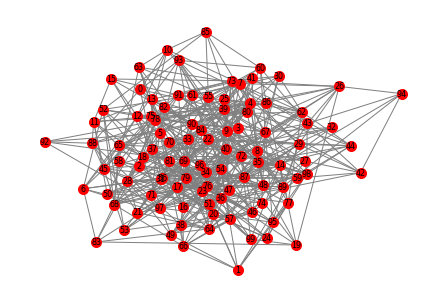

In [2]:
# Generate random weighted graph with 100 vertexes and 500 edges
Graph = netx.generators.random_graphs.gnm_random_graph(100, 500, 25)

for (u, v) in Graph.edges():
    Graph.edges[u,v]['weight'] = random.randint(0,20)
    
netx.draw(Graph, node_size=100,  with_labels=True, node_color='Red', width=1, edge_color='Gray', font_size=8)

In [3]:
# Construct and print adjacency matrix
adj_matrix = netx.to_numpy_matrix(Graph)

adj_matrix[:5,:]

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,
         18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 14.,  0.,
         18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,
          0.,  0., 18.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.,  0.,  6.,
          0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

#### Part 1: Find shortest path from vertex with Dijkstra and Bellman ford algorithms

In [13]:
# Generate candidate starting vertex
random.seed(10)

start_ver = random.randint(0, 100)
others = np.arange(0, 100, 1)
others = np.delete(others, np.where(others == start_ver))
        
print('Start vertex: ', start_ver)
print('Check if vertex is deleted from graph: ', others)

Start vertex:  73
Check if vertex is deleted from graph:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


In [5]:
# Dijkstra algorithm

djk_estimate = []
for i in range(0,10):
    start_time = timeit.default_timer() # Start to time
    
    for item in others:
        path_d = netx.dijkstra_path(Graph, source = start_ver, target = item, weight = "weight")
        if i==1 and any(item == [1, 2, 3, 99, 98, 97]):
            print(f"Shortest path [{start_ver}] -> [{item}]: {path_d} \n")
        elif i==1 and item==4:
            print('................')
            
    djk_estimate.append(timeit.default_timer() - start_time) # Finish and write the result to the list
    
djk_estimate = np.array(djk_estimate)
print("Overall avg. Dijkstra time: ", np.mean(djk_estimate))

Shortest path [73] -> [1]: [73, 20, 54, 72, 98, 1] 

Shortest path [73] -> [2]: [73, 20, 7, 10, 2] 

Shortest path [73] -> [3]: [73, 20, 54, 16, 64, 3] 

................
Shortest path [73] -> [97]: [73, 26, 28, 97] 

Shortest path [73] -> [98]: [73, 20, 54, 72, 98] 

Shortest path [73] -> [99]: [73, 20, 54, 16, 64, 79, 99] 

Overall avg. Dijkstra time:  0.022762039999999973


In [6]:
# Bellman-Ford algorithm

bell_estimate = []
for i in range(0, 10):
    start_time = timeit.default_timer() # Start to time
    
    for item in others:
        path_d = netx.bellman_ford_path(Graph, source = start_ver, target = item, weight = "weight")
        if i==1 and any(item == [1, 2, 3, 99, 98, 97]):
            print(f"Shortest path [{start_ver}] -> [{item}]: {path_d} \n")
        elif i==1 and item==4:
            print('................')
            
    bell_estimate.append(timeit.default_timer() - start_time) # Finish and write the result to the list
    
bell_estimate = np.array(bell_estimate)
print("Overall avg. Bellman-Ford time: ", np.mean(bell_estimate))

Shortest path [73] -> [1]: [73, 20, 54, 72, 98, 1] 

Shortest path [73] -> [2]: [73, 20, 7, 10, 2] 

Shortest path [73] -> [3]: [73, 20, 54, 16, 64, 3] 

................
Shortest path [73] -> [97]: [73, 26, 28, 97] 

Shortest path [73] -> [98]: [73, 20, 54, 72, 98] 

Shortest path [73] -> [99]: [73, 20, 54, 16, 64, 79, 99] 

Overall avg. Bellman-Ford time:  0.09795186000000022


[0.1053519 0.0987065 0.0991392 0.0988045 0.0968144 0.0969    0.0960928
 0.095008  0.0972068 0.0954945]


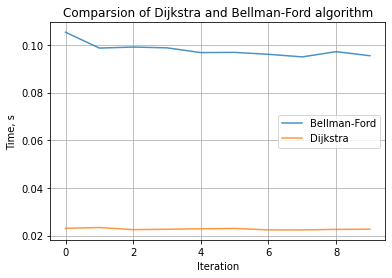

In [7]:
x_data = range(0, 10)
print(bell_estimate)
plt.plot(x_data, bell_estimate, alpha = 0.8, label = "Bellman-Ford")
plt.plot(x_data, djk_estimate, alpha = 0.8, label = "Dijkstra")
plt.xlabel('Iteration')
plt.ylabel('Time, s')
plt.title('Comparsion of Dijkstra and Bellman-Ford algorithm')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### Part 2: Shortest path with A* algorithm

In [8]:
# Function for calculate distance
def dist(par1, par2):
    (x1, y1) = par1
    (x2, y2) = par2
    return (((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


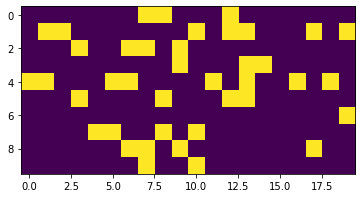

In [9]:
# Generate map

grid = []

for i in range (10):
    b = np.zeros(20)
    grid.append(b)
grid = np.asarray(grid)


# Generate obstacle cells
random.seed(4)
obstacles = []
new_ost = (random.randint(0, 9), random.randint(0, 19))

for i in range(40):
    
    while new_ost in obstacles:
        new_ost = (random.randint(0, 9), random.randint(0, 19))
        
    obstacles.append(new_ost) 

for item in obstacles:
    grid[item[0]][item[1]] = 1
    
plt.imshow(grid)
random.seed()

#### Making graph out of grid map

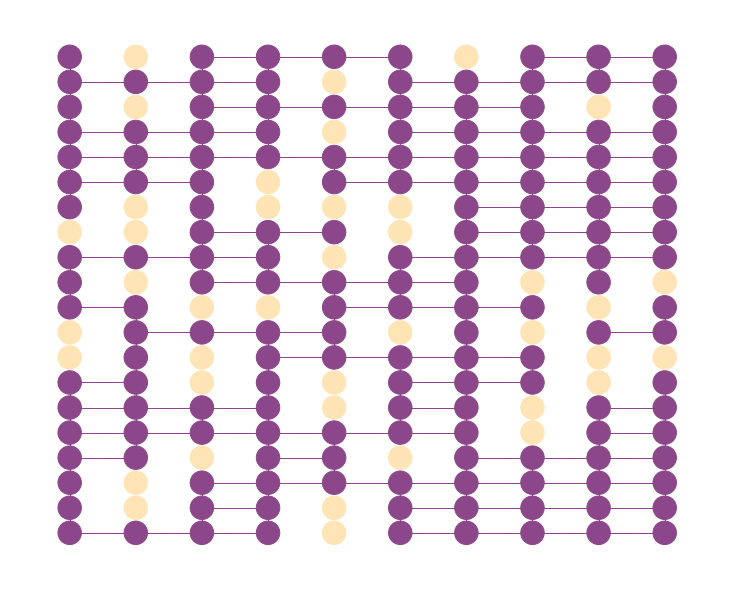

In [10]:
Grid_grap = netx.grid_2d_graph(10, 20)

obstacles_list = np.argwhere(grid == 1).tolist()

for (u, v) in Grid_grap.edges():
    if (list(v) in obstacles_list) or (list(u) in obstacles_list):        
        Grid_grap.edges[u,v]['weight'] = 100000
        Grid_grap.edges[u,v]['color'] = 'w'
    else:
        Grid_grap.edges[u,v]['weight'] = 0
        Grid_grap.edges[u,v]['color'] = '#8B4789'
        
color_map = []

for node in Grid_grap:
    if list(node) in obstacles_list:
        color_map.append('#FFE4B5')
    else: 
        color_map.append('#8B4789')
        
colors = [Grid_grap[u][v]['color'] for u,v in Grid_grap.edges()]  
plt.figure(1,figsize=(10,8)) 
netx.draw(Grid_grap, dict( (n, n)  for n in Grid_grap.nodes() ), node_size=550, node_color=color_map, edge_color=colors,  width=1, font_size=12)

#### Finding shortest path with A* search

In [11]:
def A_path_search(start, end, distance):
    path_a = netx.astar_path(Grid_grap, source = start, target = end, heuristic = distance)
    print(f'Founded path [{start}] -> [{end}]: ', path_a)
    path_a = np.array(path_a)

    plt.scatter(start[1], start[0], c = '#C6E2FF', s = 150, label = 'Start')
    plt.scatter(end[1], end[0], c = '#FFC0CB', s = 150, label = 'End')
    plt.plot(path_a[:, 1], path_a[:, 0], color = "red")
    plt.imshow(grid)
    plt.legend(bbox_to_anchor=(0.72, 0.55, 0.5, 0.5))
    plt.show()
    

Founded path [(4, 7)] -> [(4, 17)]:  [(4, 7), (4, 8), (4, 9), (4, 10), (3, 10), (3, 11), (3, 12), (2, 12), (2, 13), (2, 14), (2, 15), (3, 15), (3, 16), (3, 17), (4, 17)]


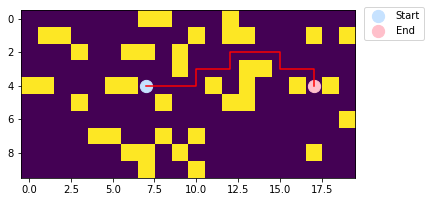

Founded path [(0, 6)] -> [(8, 11)]:  [(0, 6), (1, 6), (1, 7), (1, 8), (2, 8), (3, 8), (4, 8), (4, 9), (5, 9), (6, 9), (6, 10), (6, 11), (7, 11), (8, 11)]


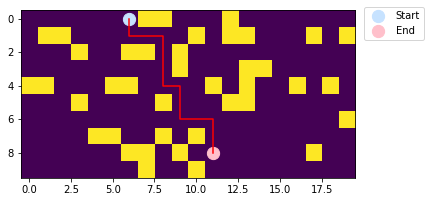

Founded path [(3, 1)] -> [(3, 7)]:  [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7)]


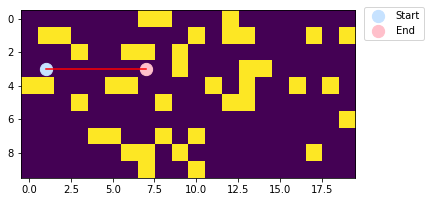

Founded path [(4, 9)] -> [(8, 1)]:  [(4, 9), (4, 8), (4, 7), (5, 7), (5, 6), (5, 5), (5, 4), (6, 4), (6, 3), (7, 3), (7, 2), (8, 2), (8, 1)]


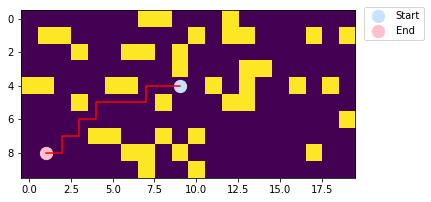

Founded path [(7, 0)] -> [(8, 4)]:  [(7, 0), (7, 1), (7, 2), (7, 3), (8, 3), (8, 4)]


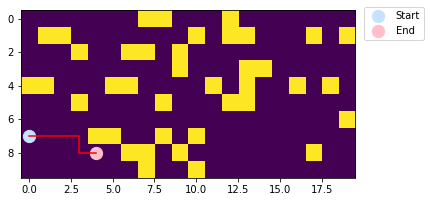

In [12]:
# Experiment path finding
starting_points = []
ending_points = []
new_point = (random.randint(0, 9), random.randint(0, 19))
new_end_point = (random.randint(0, 9), random.randint(0, 19))

for i in range(5):
    while (new_point in starting_points) or (new_point in obstacles):
        new_point = (random.randint(0, 9), random.randint(0, 19))
    starting_points.append(new_point)
    
    while (new_end_point in ending_points) or (new_end_point in obstacles):
        new_end_point = (random.randint(0, 9), random.randint(0, 19))
    ending_points.append(new_end_point)
    
    A_path_search(starting_points[i], ending_points[i], dist)